<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/lab_05_01_measuring_predictivity_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.01 - Predictions impact

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.01", varname="student");

logging in as alexander.amaya@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2024.2
success!! you are logged in
-------------


## Task 1. Compute PNL from strategy

observe the following signal `s`, and model trend predictions `p` (not perfect predictions!!)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
s = np.round((np.random.normal(size=20)*5+.5).cumsum()+100,2)
p = (np.random.random(size=len(s)-1)>.3).astype(int)
print (s.shape, p.shape)

(20,) (19,)


SIGNAL     [101.8  107.85 113.04 109.12 102.    97.55  96.19  97.07  94.13  90.35
  83.94  86.75  95.52  89.31  93.65  95.19  96.26  91.89  99.86  98.77]
PREDICTION [0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0]


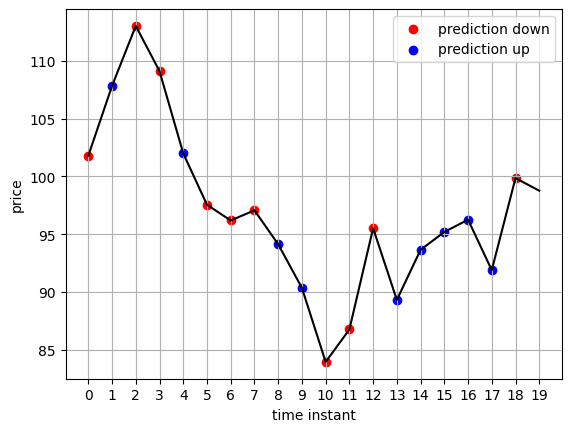

In [ ]:

plt.plot(s, color="black")
plt.scatter(np.arange(len(p))[p==0], s[:-1][p==0], color="red", label="prediction down")
plt.scatter(np.arange(len(p))[p==1], s[:-1][p==1], color="blue", label="prediction up")
plt.grid(); plt.legend(); plt.xlabel("time instant"); plt.ylabel("price")
plt.xticks(range(len(s)), range(len(s)))
pd.DataFrame(np.vstack((s,list(p)+[np.nan])), index=["signal", "prediction"])
print ("SIGNAL    ", s)
print ("PREDICTION", p)


fill in the `pnl` variable below with a list of 19 values corresponding on applying the same strategy as in the notes, buying or selling always ONE money unit:

- if the prediction is zero, we believe the price is going down, so we sell ONE money unit at the current price and buy it at the next instant of time
- if the prediction is one, we do the opposite
- BUT there is a **commission** of 1%, applied on the instant you make the first operation (which uses the current price)

observe that there are 20 signal points, and 19 predictions.

you can use your tool of choice (Excel, Python, etc.) to compute your answer

**HINT**: Understand each component of the expression for `perfect_prediction` below to try to obtain your answer with Python.



**For instance**: the following signal and predictions:

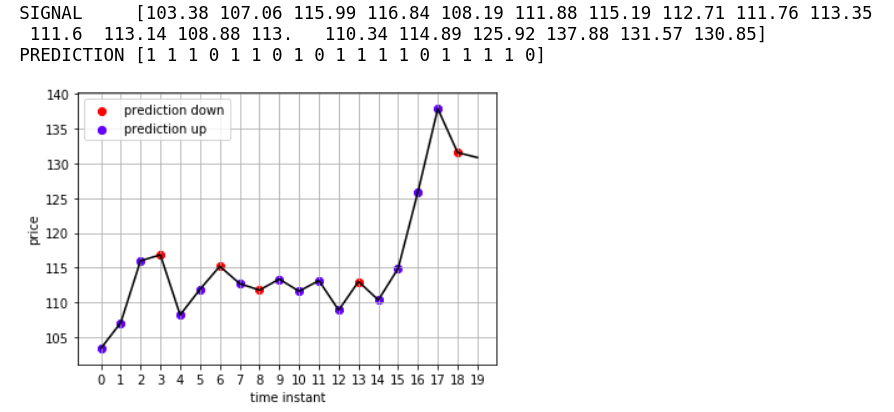

In [ ]:

from IPython.display import Image
Image("local/imgs/timeseries-prediction.png", width=600)


produce the following set of PNL

     2.65 7.86 -0.31 7.48 2.61 2.19 1.33 -2.08 -2.71 -2.88 0.42 -5.39 3.03 1.53 3.45 9.88 10.70 -7.69 -0.60
     
- at `t=0` the PNL is $(107.06-103.38)\times 1 - 103.38\times 1 \times .01=2.65$, since the prediction was correct
- at `t=2` the PNL is $(116.84-115.99)\times 1 - 115.99\times 1 \times .01=-0.31$, since the prediction was correct, BUT the price difference is small and the commission overcomes the profit.
- at `t=7` the PNL is $(111.76 - 112.71)\times1 - 112.71\times1\times.01=-2.08$, since the prediction was incorrect


in the expressions above, the first term is the net profit or loss, and the second one is due to the commission. Multiplication by $1$ simply signals we are trading ONE unit.

also, observe that the following python code, will generate a perfect prediction signal, which, when applied to our strategy, will result in a list of all positive PNLs.

In [ ]:
perfect_prediction = (s[1:]>s[:-1]).astype(int)
display(perfect_prediction)
display(len(perfect_prediction))

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0])

19

In [ ]:
display(s)
display(len(s))
display(p)

array([101.8 , 107.85, 113.04, 109.12, 102.  ,  97.55,  96.19,  97.07,
        94.13,  90.35,  83.94,  86.75,  95.52,  89.31,  93.65,  95.19,
        96.26,  91.89,  99.86,  98.77])

20

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**CHALLENGE 1** (not mandatory): make your answer in python

**hints**:

    s[1:]            will give you all elements of s except the first one
    s[:-1]           will give you all elements of s except the last one
    s[1:] - s[:-1]   will give you the difference of price in one time with respect to the next one
    (p-0.5)*2        will convert vector p (containing 0's and 1's) into a vector of -1's and +1's

In [ ]:
new_p = (p-0.5)*2
pnl = ((s[1:] - s[:-1])*new_p[0:]) - s[:-1] * 1 *0.01
display(pnl)

rounded_pnl = np.round(pnl,2)
rounded_pnl

array([-7.068 ,  4.1115,  2.7896,  6.0288, -5.47  ,  0.3845, -1.8419,
        1.9693, -4.7213, -7.3135, -3.6494, -9.6375,  5.2548,  3.4469,
        0.6035,  0.1181, -5.3326,  7.0511,  0.0914])

array([-7.07,  4.11,  2.79,  6.03, -5.47,  0.38, -1.84,  1.97, -4.72,
       -7.31, -3.65, -9.64,  5.25,  3.45,  0.6 ,  0.12, -5.33,  7.05,
        0.09])

**fill in the following variable**

In [ ]:
pnl = list(rounded_pnl)
pnl

[-7.07,
 4.11,
 2.79,
 6.03,
 -5.47,
 0.38,
 -1.84,
 1.97,
 -4.72,
 -7.31,
 -3.65,
 -9.64,
 5.25,
 3.45,
 0.6,
 0.12,
 -5.33,
 7.05,
 0.09]

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Simulated prediction signal

given the following signal, produce a synthetic prediction signal with the given percentage of correct predictions.

observe that `s` has length 21, but your synthetic prediction will have a length of 20.

fill in the variable `prediction`, with a list with 20 zeros or ones, containing a prediction with `acc` correct predictions.

for instance, with the following signal

        [100.37 102.92 102.69 104.57 105.06  97.9  103.   100.32  97.59 107.07
         112.19 106.32 104.14 100.3   97.03 107.28 100.36 100.99 111.48 117.07
         126.04]
         
the following predictions:

        p = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]
        
produce a trend prediction accuracy of 60% (`acc=0.6`)

**HINT**: Do it in Python

- use the perfect prediction from the exercise above to start with.
- use `np.random.permutation`

for instance:

In [ ]:

# a list
a = np.r_[10,20,30,40,50,60,70,80,90]

# 3 positions randomly chosen
k = np.random.permutation(len(a)-1)[:3]
print (k)

# changing the value of the items on those positions
a[k] = a[k] + 1
a


[5 7 2]


array([10, 20, 31, 40, 50, 61, 70, 81, 90])

**your signal and target accuracy to achieve**

In [ ]:

s = ((np.random.normal(size=21)*5+.5).cumsum()+100).round(2)
acc = np.round(np.random.random()*.9+.1, 1)
print ("YOUR SIGNAL", s)
print ("THE ACCURACY YOUR SYNTHETIC PREDICTIONS MUST ACHIEVE: ", acc)


YOUR SIGNAL [ 98.8   97.71  98.39  96.38  93.36  90.78  89.71  92.5   96.3   99.4
 101.85 103.92 103.65 103.41  99.58 105.4  104.65 108.96 105.69 113.51
 113.86]
THE ACCURACY YOUR SYNTHETIC PREDICTIONS MUST ACHIEVE:  0.6


In [ ]:
# Given signal and accuracy
s = np.array([98.8, 97.71, 98.39, 96.38, 93.36, 90.78, 89.71, 92.5, 96.3, 99.4,
              101.85, 103.92, 103.65, 103.41, 99.58, 105.4, 104.65, 108.96, 105.69, 113.51, 113.86])
acc = 0.6  # target accuracy

In [ ]:
# Step 1: Calculate the "perfect" trend predictions
perfect_prediction = np.array([1 if s[i+1] > s[i] else 0 for i in range(len(s)-1)])

# Step 2: Calculate the number of correct predictions based on target accuracy
total_predictions = len(perfect_prediction)
correct_predictions_count = int(acc * total_predictions)

# Step 3: Create a copy of perfect_prediction and introduce errors
my_synthetic_prediction = perfect_prediction.copy()

# Determine positions to flip to match the target accuracy
num_errors = total_predictions - correct_predictions_count
error_indices = np.random.permutation(total_predictions)[:num_errors]

# Flip the values at the selected error indices
my_synthetic_prediction[error_indices] = 1 - my_synthetic_prediction[error_indices]

In [ ]:
print("Signal:", s)
print("Perfect Prediction:", perfect_prediction)
print("Synthetic Prediction:", my_synthetic_prediction)
print("Accuracy Achieved:", np.mean(my_synthetic_prediction == perfect_prediction))

Signal: [ 98.8   97.71  98.39  96.38  93.36  90.78  89.71  92.5   96.3   99.4
 101.85 103.92 103.65 103.41  99.58 105.4  104.65 108.96 105.69 113.51
 113.86]
Perfect Prediction: [0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1]
Synthetic Prediction: [0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1]
Accuracy Achieved: 0.6


In [ ]:
my_synthetic_prediction = [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: ML Metric vs Business Metric

now, your are given a signal (length=21) and you will have to create

- an array of 9 rows x 20 columns with synthetic predictions so that the first row (row number zero in python) has accuracy of 10%, the second has 20%, etc.
- a list of 9 numbers containing the PNL of using the synthetic predictions on the above array as input for a trading strategy.

for instance, for this signal:

    [101.33,  96.75,  98.2 ,  95.3 ,  97.96,  98.75,  92.46,  82.2 , 78.61,  80.  ,  
      88.78,  98.72, 103.22, 113.65, 103.89, 107.36, 114.6 , 103.9 , 108.71, 104.2 , 107.8 ]

you will have to create the following variables:

    pset = np.array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
                     [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
                     [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
                     [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
                     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
                     [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                     [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
                     [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
                     [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]])

    
    pnl = np.array([-121.5, -69.44, -62.90, -46.72, -4.08, -19.04, 23.5, 41.0, 77.02])
    
**NOTE**: Specify your PNL rounded to **TWO** decimal places

In [ ]:
s = ((np.random.normal(size=21)*5+.5).cumsum()+100).round(2)
s

array([105.46, 106.4 , 104.96, 103.72, 111.58, 111.78, 104.91, 101.08,
       105.33, 107.63, 111.06, 107.54, 112.53, 112.33, 112.69, 112.87,
       113.3 , 115.37, 113.1 , 110.99, 121.68])

In [ ]:
# Generate the signal (length=21)
signal = np.array([105.46, 106.4 , 104.96, 103.72, 111.58, 111.78, 104.91, 101.08,
       105.33, 107.63, 111.06, 107.54, 112.53, 112.33, 112.69, 112.87,
       113.3 , 115.37, 113.1 , 110.99, 121.68])

In [ ]:
# Function to generate synthetic prediction with given accuracy
def generate_prediction(signal, accuracy):
    # Perfect prediction
    perfect_prediction = (np.diff(signal) > 0).astype(int)
    total_predictions = len(perfect_prediction)
    correct_predictions = int(total_predictions * accuracy)
    incorrect_predictions = total_predictions - correct_predictions

    # Create initial perfect prediction and add errors for required accuracy
    prediction = perfect_prediction.copy()
    flip_indices = np.random.permutation(total_predictions)[:incorrect_predictions]
    prediction[flip_indices] = 1 - prediction[flip_indices]
    return prediction

In [ ]:
# Generate the 9x20 matrix of synthetic predictions
pset = np.array([generate_prediction(signal, acc / 10) for acc in range(1, 10)])

In [ ]:
# Function to calculate PNL for a given prediction set
def calculate_pnl(signal, predictions):
    pnl = []
    for i in range(len(predictions)):
        if predictions[i] == 0:  # Predicted down
            profit_loss = (signal[i] - signal[i + 1]) - (signal[i] * 0.01)
        else:  # Predicted up
            profit_loss = (signal[i + 1] - signal[i]) - (signal[i] * 0.01)
        pnl.append(profit_loss)
    return round(sum(pnl), 2)  # Total PNL for the set

In [ ]:
# Calculate PNL for each row in the prediction matrix
pnl = np.array([calculate_pnl(signal, row) for row in pset])

In [ ]:
print("Signal:", signal)
print("Prediction Matrix (pset):\n", pset)
print("PNL Array (pnl):\n", pnl)

Signal: [105.46 106.4  104.96 103.72 111.58 111.78 104.91 101.08 105.33 107.63
 111.06 107.54 112.53 112.33 112.69 112.87 113.3  115.37 113.1  110.99
 121.68]
Prediction Matrix (pset):
 [[0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0]
 [0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1]
 [0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1]
 [1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1]
 [1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1]
 [1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1]]
PNL Array (pnl):
 [-61.09 -54.57 -50.59 -18.33  -3.95 -26.31  14.59  21.43  31.93]


In [ ]:
# a 9x20 numpy array
pset

# 9 elements numpy array or list
pnl

array([-61.09, -54.57, -50.59, -18.33,  -3.95, -26.31,  14.59,  21.43,
        31.93])

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_03");

### understand accuracy vs. PNL

- what is the minimum accuracy from which a model might be profitable?
- and if the commision changes?

Text(0, 0.5, 'PNL')

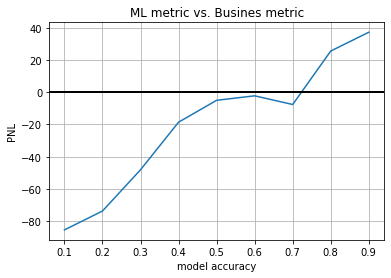

In [ ]:

accuracies = np.linspace(.1,.9,9)
plt.plot(accuracies, pnl)
plt.axhline(0, color="black", lw=2)
plt.title("ML metric vs. Busines metric")
plt.grid(); plt.xlabel("model accuracy"); plt.ylabel("PNL")
